# Lecture 4 (02 Nov 2024)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kosavina/hse-python-2024/blob/main/Lecture_4.ipynb)

In [ ]:
x = [11, 2, 3, 2, 1, 5, 6, 5]

In [ ]:
from functools import reduce

In [ ]:
def f(x, y):
  if y not in x:
    x.append(y)
  return x

In [ ]:
reduce(f, x, [])

[11, 2, 3, 1, 5, 6]

In [ ]:
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, iterable[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence
    or iterable, from left to right, so as to reduce the iterable to a single
    value.  For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the iterable in the calculation, and serves as a default when the
    iterable is empty.



## A little bit more on classes

In [ ]:
import numpy as np
x = np.array([1, 2, 3])

In [ ]:
x

array([1, 2, 3])

In [ ]:
print(x)

[1 2 3]


In [ ]:
5 + 5

10

In [ ]:
'asd' + 'qwe'

'asdqwe'

In [ ]:
5 * 'asd'

'asdasdasdasdasd'

In [ ]:
class NewInteger:
  def __init__(self, x):
    self.x = x

  def __repr__(self):
    return str(self.x)

  def __str__(self):
    return 'My value is ' + str(self.x)

  # def __add__(self, y):
  #   return NewInteger(-(self.x + y.x))

  def add(self, y):
    return NewInteger(-(self.x + y.x))

  def __mul__(self, y):
    return NewInteger(self.x * y.x + 1)

In [ ]:
num_1 = NewInteger(2)
num_2 = NewInteger(2)

In [ ]:
num_1.add(num_2)

-4

In [ ]:
num_1 + num_2

TypeError: unsupported operand type(s) for +: 'NewInteger' and 'NewInteger'

In [ ]:
num_1 * num_2

5

In [ ]:
type(num_1)

__main__.NewInteger

In [ ]:
num_1.__class__

__main__.NewInteger

## [Numpy](https://numpy.org/doc/stable/user/index.html)

To use Numpy, we first need to import the `numpy` package. By convention, we import it using the alias `np`. Then, when we want to use modules or functions in this library, we preface them with `np.`

In [ ]:
import numpy as np

### Arrays and array construction

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can create a `numpy` array by passing a Python list to `np.array()`.

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array

This creates the array we can see on the right here:

![](http://jalammar.github.io/images/numpy/create-numpy-array-1.png)

In [ ]:
print(type(a), a.shape, a[0], a[1], a[2])

<class 'numpy.ndarray'> (3,) 1 2 3


In [ ]:
a[0] = 5                 # Change an element of the array
print(a)

[5 2 3]


To create a `numpy` array with more dimensions, we can pass nested lists, like this:

![](http://jalammar.github.io/images/numpy/numpy-array-create-2d.png)

![](http://jalammar.github.io/images/numpy/numpy-3d-array.png)

In [ ]:
b = np.array([[1,2],[3,4]])   # Create a rank 2 array
print(b)

[[1 2]
 [3 4]]


In [ ]:
print(b.shape)

(2, 2)


In [ ]:
np.random.rand(3, 3)

array([[0.71600909, 0.21628865, 0.92946422],
       [0.28751672, 0.39892083, 0.30236715],
       [0.65122556, 0.45746312, 0.93283729]])

There are often cases when we want numpy to initialize the values of the array for us. numpy provides methods like `ones()`, `zeros()`, and `random.random()` for these cases. We just pass them the number of elements we want it to generate:

![](http://jalammar.github.io/images/numpy/create-numpy-array-ones-zeros-random.png)

We can also use these methods to produce multi-dimensional arrays, as long as we pass them a tuple describing the dimensions of the matrix we want to create:

![](http://jalammar.github.io/images/numpy/numpy-matrix-ones-zeros-random.png)

![](http://jalammar.github.io/images/numpy/numpy-3d-array-creation.png)

Sometimes, we need an array of a specific shape with “placeholder” values that we plan to fill in with the result of a computation. The `zeros` or `ones` functions are handy for this:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(4)        # Create a 2x2 identity matrix
print(d)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.59492837 0.73232785]
 [0.39384679 0.18755127]]


In [ ]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



Lastly, I want to mention two very useful functions for creating sequences of numbers within a specified range, namely, arange and linspace. NumPy’s arange function follows the same syntax as Python’s range objects: If two arguments are provided, the first argument represents the start value and the second value defines the stop value of a half-open interval:

Numpy also has two useful functions for creating sequences of numbers: `arange` and `linspace`.

The `arange` function accepts three arguments, which define the start value, stop value of a half-open interval, and step size. (The default step size, if not explicitly specified, is 1; the default start value, if not explicitly specified, is 0.)

The `linspace` function is similar, but we can specify the number of values instead of the step size, and it will create a sequence of evenly spaced values.

In [ ]:
%%time

np.array(range(int(1.e8)))

11.5 s ± 602 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%time

np.arange(1.e8)

251 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
f = np.arange(5, 10, 0.55)   # Create an array of values starting at 10 in increments of 5
print(f)

[5.   5.55 6.1  6.65 7.2  7.75 8.3  8.85 9.4  9.95]


Note this ends on 45, not 50 (does not include the top end of the interval).

In [ ]:
g = np.linspace(0., 1., num=5)
print(g)

[0.   0.25 0.5  0.75 1.  ]


<Axes: >

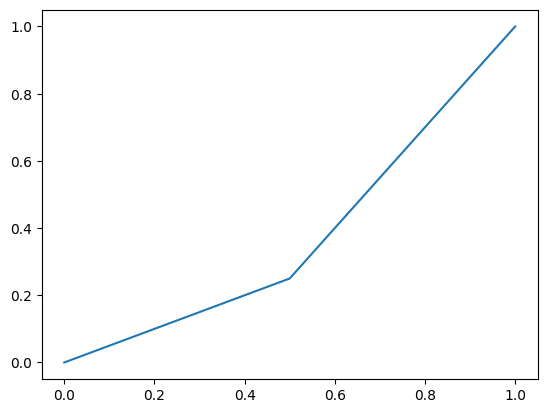

In [ ]:
def f(x):
  return x ** 2

import seaborn as sns

x = np.linspace(0, 1, num=4)
sns.lineplot(x=x, y=f(x))

Sometimes, we may want to construct an array from existing arrays by “stacking” the existing arrays, either vertically or horizontally. We can use `vstack()` (or `row_stack`) and `hstack()` (or `column_stack`), respectively.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])


In [ ]:
np.dstack((a, b)).shape

(1, 3, 2)

In [ ]:
a = np.array([[7], [8], [9]])
b = np.array([[4], [5], [6]])
np.hstack((a,b))

array([[7, 4],
       [8, 5],
       [9, 6]])

### Array indexing

Numpy offers several ways to index into arrays.

We can index and slice numpy arrays in all the ways we can slice Python lists:

![](http://jalammar.github.io/images/numpy/numpy-array-slice.png)

And you can index and slice numpy arrays in multiple dimensions. If slicing an array with more than one dimension, you should specify a slice for each dimension:

![](http://jalammar.github.io/images/numpy/numpy-matrix-indexing.png)

In [ ]:
l = [[1, 2], [3, 4]]
a = np.array(l)

In [ ]:
a.shape

(2, 2)

In [ ]:
a

array([[1, 2],
       [3, 4]])

In [ ]:
a[1, 1]

4

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


In [ ]:
a = np.arange(16).reshape(4, 4)
a


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
z = a[1:3, 1:3] * 4

In [ ]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
z

array([[ 6,  7],
       [10, 11]])

In [ ]:
a[1, 1] = 777

In [ ]:
a

array([[  0,   1,   2,  99],
       [  4, 777,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [ ]:
z[1, 1] = 888

In [ ]:
z

array([[777,   6],
       [  9, 888]])

In [ ]:
a

array([[  0,   1,   2,  99],
       [  4, 777,   6,   7],
       [  8,   9, 888,  11],
       [ 12,  13,  14,  15]])

In [ ]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [ ]:

b = a[2:4, 2:4]

In [ ]:

b = a[2:4, 2:4] + 1

In [ ]:
a

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [ ]:
[0, 0] = 999

SyntaxError: cannot assign to literal (<ipython-input-205-371c4df8f3bf>, line 1)

In [ ]:
a

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1., 999.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   1.,   1.]])

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
a


array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
# Create an array of indices
columns = np.array([0, 2, 0, 1])
rows = np.array([0, 1, 2, 3])

# Select one element from each row of a using the indices in b
print(a[rows, columns])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[21  2  3]
 [ 4  5 26]
 [27  8  9]
 [10 31 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])
print(a)
bool_idx = (a > 2)
print(bool_idx)

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
# print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]


When working with numpy arrays, it’s often helpful to get the *indices* (not only the values) of array elements that meet certain conditions. There are a few numpy functions that you’ll definitely want to remember:

-   [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) (get index of maximum element in array)
-   [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) (get index of minimum element in array)
-   [`argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) (get sorted list of indices, by element value, in ascending order)
-   [`where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) (get indices of elements that meet some condition)

In [ ]:
np.where(a > 5)

(array([1, 2, 6, 7]),)

In [ ]:
a > 5

array([False,  True,  True, False, False, False,  True,  True])

In [ ]:
a = np.array([1, 8, 9, -3, 2, 4, 7, 9])

# Get the index of the maximum element in a
print(np.argmax(a))

# Get the index of the minimum element in a
# (this array has two elements with the maximum value -
# only one index is returned)
print(np.argmin(a))

# Get sorted list of indices
print(np.argsort(a))

# Get sorted list of indices in descending order
# [::-1] is a special slicing index that returns the reversed list
print(np.argsort(a)[::-1])

# Get indices of elements that meet some condition
# this returns a tuple, the list of indices is the first entry
# so we use [0] to get it
print(np.where(a > 5)[0])

# Get indices of elements that meet some condition
# this example shows how to get the index of *all* the max values
print(np.where(a >= a[np.argmax(a)])[0])

2
3
[3 0 4 5 6 1 2 7]
[7 2 1 6 5 4 0 3]
[1 2 6 7]
[2 7]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int32)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int32


In [ ]:
2 ** 64 - 1

18446744073709551615

In [ ]:
np.array([18446744073709551615 + 1])

array([18446744073709551616], dtype=object)

### Array math

What makes working with `numpy` so powerful and convenient is that it comes with many *vectorized* math functions for computation over elements of an array. These functions are highly optimized and are *very* fast - much, much faster than using an explicit `for` loop.

For example, let’s create a large array of random values and then sum it both ways. We’ll use a `%%time` *cell magic* to time them.

In [ ]:
a = np.random.random(100_000_000)

In [ ]:
a

array([0.58496724, 0.43043052, 0.21931002, ..., 0.23189521, 0.07006445,
       0.20807569])

In [ ]:
%%time
x = np.sum(a)

CPU times: user 76.8 ms, sys: 0 ns, total: 76.8 ms
Wall time: 76.9 ms


In [ ]:
%%time
x = 0
for element in a:
  x = x + element

CPU times: user 19.8 s, sys: 0 ns, total: 19.8 s
Wall time: 19.9 s


Look at the “Wall Time” in the output - note how much faster the vectorized version of the operation is! This type of fast computation is a major enabler of machine learning, which requires a *lot* of computation.

Whenever possible, we will try to use these vectorized operations.

Some mathematic functions are available both as operator overloads and as functions in the numpy module.

For example, you can perform an elementwise sum on two arrays using either the + operator or the `add()` function.

![](http://jalammar.github.io/images/numpy/numpy-arrays-adding-1.png)

![](http://jalammar.github.io/images/numpy/numpy-matrix-arithmetic.png)

In [ ]:
a = [1 ,2 ]
b = [3, 4]
c = [0, 0]
for i in range(2):
  c[i] = a[i] + b[i]

c

[4, 6]

In [ ]:
a + b

[1, 2, 3, 4]

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


And this works for other operations as well, not only addition:

![](http://jalammar.github.io/images/numpy/numpy-array-subtract-multiply-divide.png)

In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot()` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot()` is available both as a function in the numpy module and as an instance method of array objects:

![](http://jalammar.github.io/images/numpy/numpy-matrix-dot-product-1.png)

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
v * w

array([ 99, 120])

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Besides for the functions that overload operators, Numpy also provides many useful functions for performing computations on arrays, such as `min()`, `max()`, `sum()`, and others:

![](http://jalammar.github.io/images/numpy/numpy-matrix-aggregation-1.png)

In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])

print(np.max(x))  # Compute max of all elements; prints "6"
print(np.min(x))  # Compute min of all elements; prints "1"
print(np.sum(x))  # Compute sum of all elements; prints "21"

Not only can we aggregate all the values in a matrix using these functions, but we can also aggregate across the rows or columns by using the `axis` parameter:

![](http://jalammar.github.io/images/numpy/numpy-matrix-aggregation-4.png)

In [ ]:
x

array([[1, 2],
       [5, 3],
       [4, 6]])

In [ ]:
np.sum(x, axis=1)

array([ 3,  8, 10])

In [ ]:
x = np.array([[1, 2], [5, 3], [4, 6]])

print(np.max(x, axis=0))  # Compute max of each column; prints "[5 6]"
print(np.max(x, axis=1))  # Compute max of each row; prints "[2 5 6]"

[5 6]
[2 5 6]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object.

![](http://jalammar.github.io/images/numpy/numpy-transpose.png)

In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])

print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]
 [5 6]]
transpose
 [[1 3 5]
 [2 4 6]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


In more advanced use case, you may find yourself needing to change the dimensions of a certain matrix. This is often the case in machine learning applications where a certain model expects a certain shape for the inputs that is different from your dataset. numpy's `reshape()` method is useful in these cases.

![](http://jalammar.github.io/images/numpy/numpy-reshape.png)

A common task in this class will be to convert a 1D array to a 2D array, and vice versa. We can use `reshape()` for this.

For example, suppose we had this 2D array, but we need to pass it to a function that expects a 1D array.

In [ ]:
w = np.array([[1],[2],[3]])
print(w)
w.shape

[[1]
 [2]
 [3]]


(3, 1)

In [ ]:
w = w.reshape(1, 1, -1)
w.shape

(1, 1, 3)

We can remove the “unnecessary” extra dimension with

In [ ]:
y = w.reshape(-1,)
print(y)
y.shape

Note that we can pass -1 as one dimension and numpy will infer the correct size based on our matrix size!

There’s also a `squeeze()` function that removes *all* of the “unnecessary” dimensions (dimensions that have size 1) from an array:

In [ ]:
z = w.squeeze()
print(z)
z.shape

[1 2 3]


(3,)

To go from a 1D to 2D array, we can just add in another dimension of size 1:

In [ ]:
y.reshape((-1,1))

### Using np.matrix

`np.matrix` is specifically designed for matrix operations and is a subclass of ndarray.

In [ ]:
# Creating an array using np.array
array_a = np.array([[1, 2],
                    [3, 4],
                    [5, 6]])
print("Array created using np.array:")
print(array_a)

Array created using np.array:
[[1 2]
 [3 4]
 [5 6]]


In [ ]:
# Creating a matrix using np.matrix
matrix_a = np.matrix([[1, 2],
                      [3, 4],
                      [5, 6]])
print("Matrix created using np.matrix:")
print(matrix_a)

Matrix created using np.matrix:
[[1 2]
 [3 4]
 [5 6]]


#### Key Differences Between np.matrix and np.array

1. Dimensionality

`np.matrix` is always two-dimensional, whereas `np.array` can be one-dimensional, two-dimensional, or more.

In [ ]:
# Checking the dimensions
print("Dimensions of matrix_a:", matrix_a.ndim)  # Should output 2
print("Dimensions of array_a:", array_a.ndim)    # Should output 2

Dimensions of matrix_a: 2
Dimensions of array_a: 2


2. Behavior of Operators

The * operator behaves differently for matrices and arrays. For np.matrix, it performs matrix multiplication. For np.array, it performs element-wise multiplication.

In [ ]:
# Matrix multiplication using np.matrix
matrix_b = np.matrix([[7, 8, 9],
                       [10, 11, 12]])
matrix_product = matrix_a * matrix_b  # Matrix multiplication
print("Matrix product (np.matrix):")
print(matrix_product)

# Element-wise multiplication using np.array
array_b = np.array([[7, 8, 9],
                     [10, 11, 12]])

# array_b = np.array([[7, 8],
#                     [9, 10],
#                     [11, 12]])

array_product = array_a * array_b  # Element-wise multiplication
print("Element-wise product (np.array):")
print(array_product)

Matrix product (np.matrix):
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]]


ValueError: operands could not be broadcast together with shapes (3,2) (2,3) 

In [ ]:
array_a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
array_b

array([[ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
array_a * array_b.reshape(3, -1)

array([[ 7, 16],
       [27, 40],
       [55, 72]])

In [ ]:
matrix_a

matrix([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
matrix_b

matrix([[ 7,  8,  9],
        [10, 11, 12]])

In [ ]:
matrix_a * matrix_b

matrix([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

3. Use of Functions

Certain functions behave differently or are not available for np.matrix. For example, the np.sum function operates differently.

In [ ]:
# Summing along an axis for np.array
sum_array = np.sum(array_a, axis=0)
print("Sum of array along axis 0 (np.array):")
print(sum_array)

# Summing along an axis for np.matrix
sum_matrix = np.sum(matrix_a, axis=0)
print("Sum of matrix along axis 0 (np.matrix):")
print(sum_matrix)

Sum of array along axis 0 (np.array):
[ 9 12]
Sum of matrix along axis 0 (np.matrix):
[[ 9 12]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations.

For example: basic linear algebra, we can only add (and perform similar element-wise operations) two matrics that have the *same* dimension. In numpy, if we want to add two matrics that have different dimensions, numpy will implicitly “extend” the dimension of one matrix to match the other so that we can perform the operation.

So these operations will work, instead of returning an error:

![](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-1.png)

![](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-2.png)

In [ ]:
a = [1, 2, 3]
a + 1

TypeError: can only concatenate list (not "int") to list

In [ ]:
a = np.array([1, 2, 3])
a + 1

array([2, 3, 4])

Broadcasting two arrays together follows these rules:

**Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

For example, in the following cell, `a` will be implicitly extended to shape (1,3):

In [ ]:
a = np.array([[1, 2, 3]])
print(a.shape)
b = np.array([6])
print(b.shape)


(1, 3)
(1,)


In [ ]:
b = np.array([[6]])
b.shape

(1, 1)

In [ ]:
b = np.array([[6, 6, 6]])
b.shape

(1, 3)

In [ ]:
a + b

array([[7, 8, 9]])

In [ ]:
a = np.array([1,2,3])         # has shape (3,): one dimension
b = np.array([[4], [5], [6]]) # has shape (3,1): two dimensions
c = a + b                     # will have shape (3,3) (two dimensions)

**Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

For example, in the following cell `a` will be implicitly extended to shape (3,2):

In [ ]:
a = np.array([[1],[2],[3]])         # has shape (3,1)
b = np.array([[4,5], [6,7], [8,9]]) # has shape (3,2)
c = a + b                           # will have shape (3,2)

**Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised:

In [ ]:
a = np.array([[1],[2],[3],[4]])      # has shape (4,1)
b = np.array([[4,5], [6,7], [8,9]])  # has shape (3,2)
c = a + b                            # ValueError: operands could not be broadcast

For more detail, you can read the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

In [ ]:
np.array([1 ,2]).shape

(2,)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(
      [[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]], columns=['a', 'b'])

In [ ]:
a_arr = df['a'].to_numpy()

In [ ]:
a_arr.sum()

90

In [ ]:
import numpy as np

In [ ]:
np.sum(df)

,0
a,90
b,100


In [ ]:
df['a'].to_numpy()

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Here are a few visual examples involving broadcasting.

![](http://jalammar.github.io/images/numpy/numpy-array-broadcast.png)

Note that these arrays are compatible in each dimension if they have either the same size in that dimension, or if one array has size 1 in that dimension.

![](http://jalammar.github.io/images/numpy/numpy-matrix-broadcast.png)

And here are some more practical applications:

In [ ]:
data = np.arange(1, 7).reshape(-1, 2)
print(data.shape)

ones_row = np.array([[1, 1]])
print(ones_row.shape)


(3, 2)
(1, 2)


In [ ]:
range*

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.